In [1]:
#导入numpy
import numpy as np
#导人画图工具
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#导入tree 模型和数据集加载工具
from sklearn import tree,datasets
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
#只选取数据集的前两个特征
X =wine.data[:,:2]
y =wine.target
#刊号数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
#设定随机森林中有6棵树
forest = RandomForestClassifier (n_estimators=6,random_state=3)#random_state应该是他随机选择特征的时候用的
#使用模型拟合数据
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

这里的Boostrap指的是才采样数据集的时候采用的是放回采样，因为有多棵决策树需要训练，要尽量保证训练每一棵树的数据是不一样的，所以要生成不一样的数据，放回采样的话，在同一个数据集当中是会采到相同的数据集的。max_features这个参数就是用来决定森林当中，不同决策树之间的相似程度的，他的意思是算法会在max_features当中随机挑选一个特征，让这个特征表现最好；如果max_features=n_features，那么就没有随机性(随机是随机选几个特征然后从里面选吧)可言了，如果为1，那么就没有挑选的余地了，只能选那个特征
所以max_features越大，森林里的每一棵树就越相似，max_features越小，就越不相似
n_estimators就是森林当中树的数量

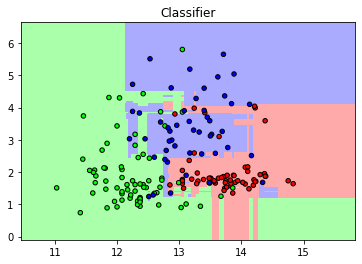

In [8]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA","#AAAAFF"])
cmap_bold = ListedColormap ([ "#FF0000","#00FF00","#0000FF"])
#分别用样本的两个特征值创建图像和横轴和纵轴
x_min,x_max= X_train[:,0].min()-1 , X_train[:,0].max() + 1
y_min , y_max = X_train [ :, 1].min()-1,X_train [ :, 1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max, 0.02),
np.arange(y_min,y_max , 0.02))
Z = forest.predict(np.c_[xx.ravel(),yy.ravel()])
#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx , yy , Z , cmap=cmap_light)
#用散点把样本表示出来
plt.scatter(X[ :,0], X[ :, 1], c=y, cmap=cmap_bold , edgecolor= "k",s =20 )
plt.xlim(xx.min() , xx.max () )#横纵坐标的范围
plt.ylim (yy.min () , yy.max ())
plt.title(  "Classifier"  )
plt.show()

In [15]:
import pandas as pd
#用pandas 打开csv 文件
data =pd.read_csv ("adult.csv",header=None,index_col=False,
names =["年龄","单位性质","权重","学历","受教育时长",
"婚姻状况","职业","家庭情况","种族","性别",
 "资产所得", "资产损失","周工作时长", "原籍",
"收入"])
#为了方便展示， 我们选取其中一部分数据
data_lite = data[["年龄","单位性质","学历","性别","周工作时长","职业","收入"]] 
#下面看一下数据的前5 行是不是我们想要的结果
display(data_lite)

,年龄,单位性质,学历,性别,周工作时长,职业,收入
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [12]:
#使用get dummies 将文本数据转化为数值
data_dummies= pd.get_dummies(data_lite)
#对比样本原始特征和虚拟变最特征
print  ("样本原始特征：\n",list(data_lite.columns),"\n")
print ("虚拟变量特征：\n",list(data_dummies.columns))

样本原始特征：
 ['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入'] 

虚拟变量特征：
 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K']


In [13]:
data_dummies#感觉就是转化成one-hot模式的了

,年龄,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,单位性质_ State-gov,...,职业_ Machine-op-inspct,职业_ Other-service,职业_ Priv-house-serv,职业_ Prof-specialty,职业_ Protective-serv,职业_ Sales,职业_ Tech-support,职业_ Transport-moving,收入_ <=50K,收入_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32557,40,40,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32558,58,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32559,22,20,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
data_dummies['收入_ >50K']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: 收入_ >50K, Length: 32561, dtype: uint8

In [21]:
data_dummies['收入_ >50K'].values#.values的话就转化成numpy的array数组

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [27]:
#定义数据集的特征值
features = data_dummies.loc[:,"年龄":"职业_ Transport-moving"]
#将特征数值赋值为x
X=features.values
#将收入大于50k作为预测目标
y=data_dummies['收入_ >50K'].values#.values的话就转化成numpy的array数组

In [28]:
X.shape

(32561, 44)

In [29]:
y.shape

(32561,)

In [32]:
#将数据及拆分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
#用最大深度为5的随机森林拟合数据
go_dating_tree=tree.DecisionTreeClassifier(max_depth=5)#容易造成过拟合
go_dating_tree.fit(X_train, y_train)
print(go_dating_tree.score(X_test,y_test))

0.7962166809974205


In [49]:
#设定随机森林中有6棵树
forest_date= RandomForestClassifier(n_estimators=10,random_state=2,max_features=10)#random_state应该是他随机选择特征的时候用的
#使用模型拟合数据
forest_date.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [50]:
forest_date.score(X_test,y_test)

0.7828276624493306

此外,除了上述我们讲解的功能，决策树和随机森林还有一个特别“体贴”的功能，
就是可以帮助用户在数据集中对数据特征的重要性进行判断。这样一来，我们还可以通
过这两个算法对高维数据集进行分析，在诸多特征中保留最重要的儿个，这样也便于我
们对数据进行降维处理。这部分内容我们在第11 章中还会有详细的讲解。